In [2]:
# basis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import QuantileTransformer

# Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import *

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

| Variables | Role | Type | Demograhic | Description |
| -------- | -------- | -------- | -------- | -------- |
| Marital Status | Feature | Integer | Marital Status | 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | Feature | Integer ||1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
| Application order | Feature | Integer | | Application order (between 0 - first choice; and 9 last choice)|
|Course|Feature|Integer||33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance|Feature|Integer||1 – daytime 0 - evening|
|Previous qualification|Feature|Integer|Education Level|1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)|
|Previous qualification (grade)|Feature|Continuous||Grade of previous qualification (between 0 and 200)|
|Nacionality|Feature|Integer|Nationality|1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification|Feature|Integer|Education Level|1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification|Feature|Integer|Education Level|1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Mother's occupation|Feature|Integer|Occupation|0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants|
|Father's occupation|Feature|Integer|Occupation|0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers|
|Admission grade|Feature|Continuous||Admission grade (between 0 and 200)|
|Displaced|Feature|Integer||1 – yes 0 – no|
|Educational special needs|Feature|Integer||1 – yes 0 – no|
|Debtor|Feature|Integer||1 – yes 0 – no|
|Tuition fees up to date|Feature|Integer||1 – yes 0 – no|
|Gender|Feature|Integer|Gender|1 – male 0 – female|
|Scholarship holder|Feature|Integer||1 – yes 0 – no|
|Age at enrollment|Feature|Integer|Age|Age of studend at enrollment|
|International|Feature|Integer||1 – yes 0 – no|
|Curricular units 1st sem (credited)|Feature|Integer||Number of curricular units credited in the 1st semester|
|Curricular units 1st sem (enrolled)|Feature|Integer||Number of curricular units enrolled in the 1st semester|
|Curricular units 1st sem (evaluations)|Feature|Integer||Number of evaluations to curricular units in the 1st semester|
|Curricular units 1st sem (approved)|Feature|Integer||Number of curricular units approved in the 1st semester|

In [11]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [174]:
df = df.rename(columns={'Nacionality':'Nationality'})

In [176]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

<b> Make int and float data be categorical

In [153]:
df['Marital status'].unique()

[1, 2, 4, 3, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [149]:
category = CategoricalDtype(categories=[1, 2,3,4,5,6], ordered=True)
df['Marital status']= df['Marital status'].astype('category')

In [155]:
df['Application mode'].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27], dtype=int64)

In [163]:
category = CategoricalDtype(categories=[17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26, 27], ordered=True)
df['Application mode']= df['Application mode'].astype('category')

In [159]:
df['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119], dtype=int64)

In [165]:
category = CategoricalDtype(categories=[ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119], ordered=True)
df['Course']= df['Course'].astype('category')

In [167]:
df['Previous qualification'].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [169]:
category = CategoricalDtype(categories=[ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14], ordered=True)
df['Previous qualification']= df['Previous qualification'].astype('category')

In [178]:
df['Nationality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [180]:
category = CategoricalDtype(categories=[  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32, 100,  24, 109,   2, 108, 105,  14,  17], ordered=True)
df['Nationality']= df['Nationality'].astype('category')

In [182]:
df['Mother\'s qualification'].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44], dtype=int64)

In [184]:
category = CategoricalDtype(categories=[19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44], ordered=True)
df['Mother\'s qualification']= df['Mother\'s qualification'].astype('category')

In [186]:
df['Father\'s qualification'].unique()

array([12,  3, 37, 38,  1, 19,  5,  4, 34,  2, 39, 11,  9, 36, 26, 40, 14,
       20, 35, 41, 22, 13, 29, 43, 18, 42, 10,  6, 30, 25, 44, 33, 27, 31],
      dtype=int64)

In [188]:
category = CategoricalDtype(categories=[12,  3, 37, 38,  1, 19,  5,  4, 34,  2, 39, 11,  9, 36, 26, 40, 14,
       20, 35, 41, 22, 13, 29, 43, 18, 42, 10,  6, 30, 25, 44, 33, 27, 31], ordered=True)
df['Father\'s qualification']= df['Father\'s qualification'].astype('category')

In [190]:
df['Mother\'s occupation'].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], dtype=int64)

In [192]:
category = CategoricalDtype(categories=[  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], ordered=True)
df['Mother\'s occupation']= df['Mother\'s occupation'].astype('category')

In [194]:
df['Father\'s occupation'].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154], dtype=int64)

In [196]:
category = CategoricalDtype(categories=[  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154], ordered=True)
df['Father\'s occupation']= df['Father\'s occupation'].astype('category')

# EDA

In [72]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

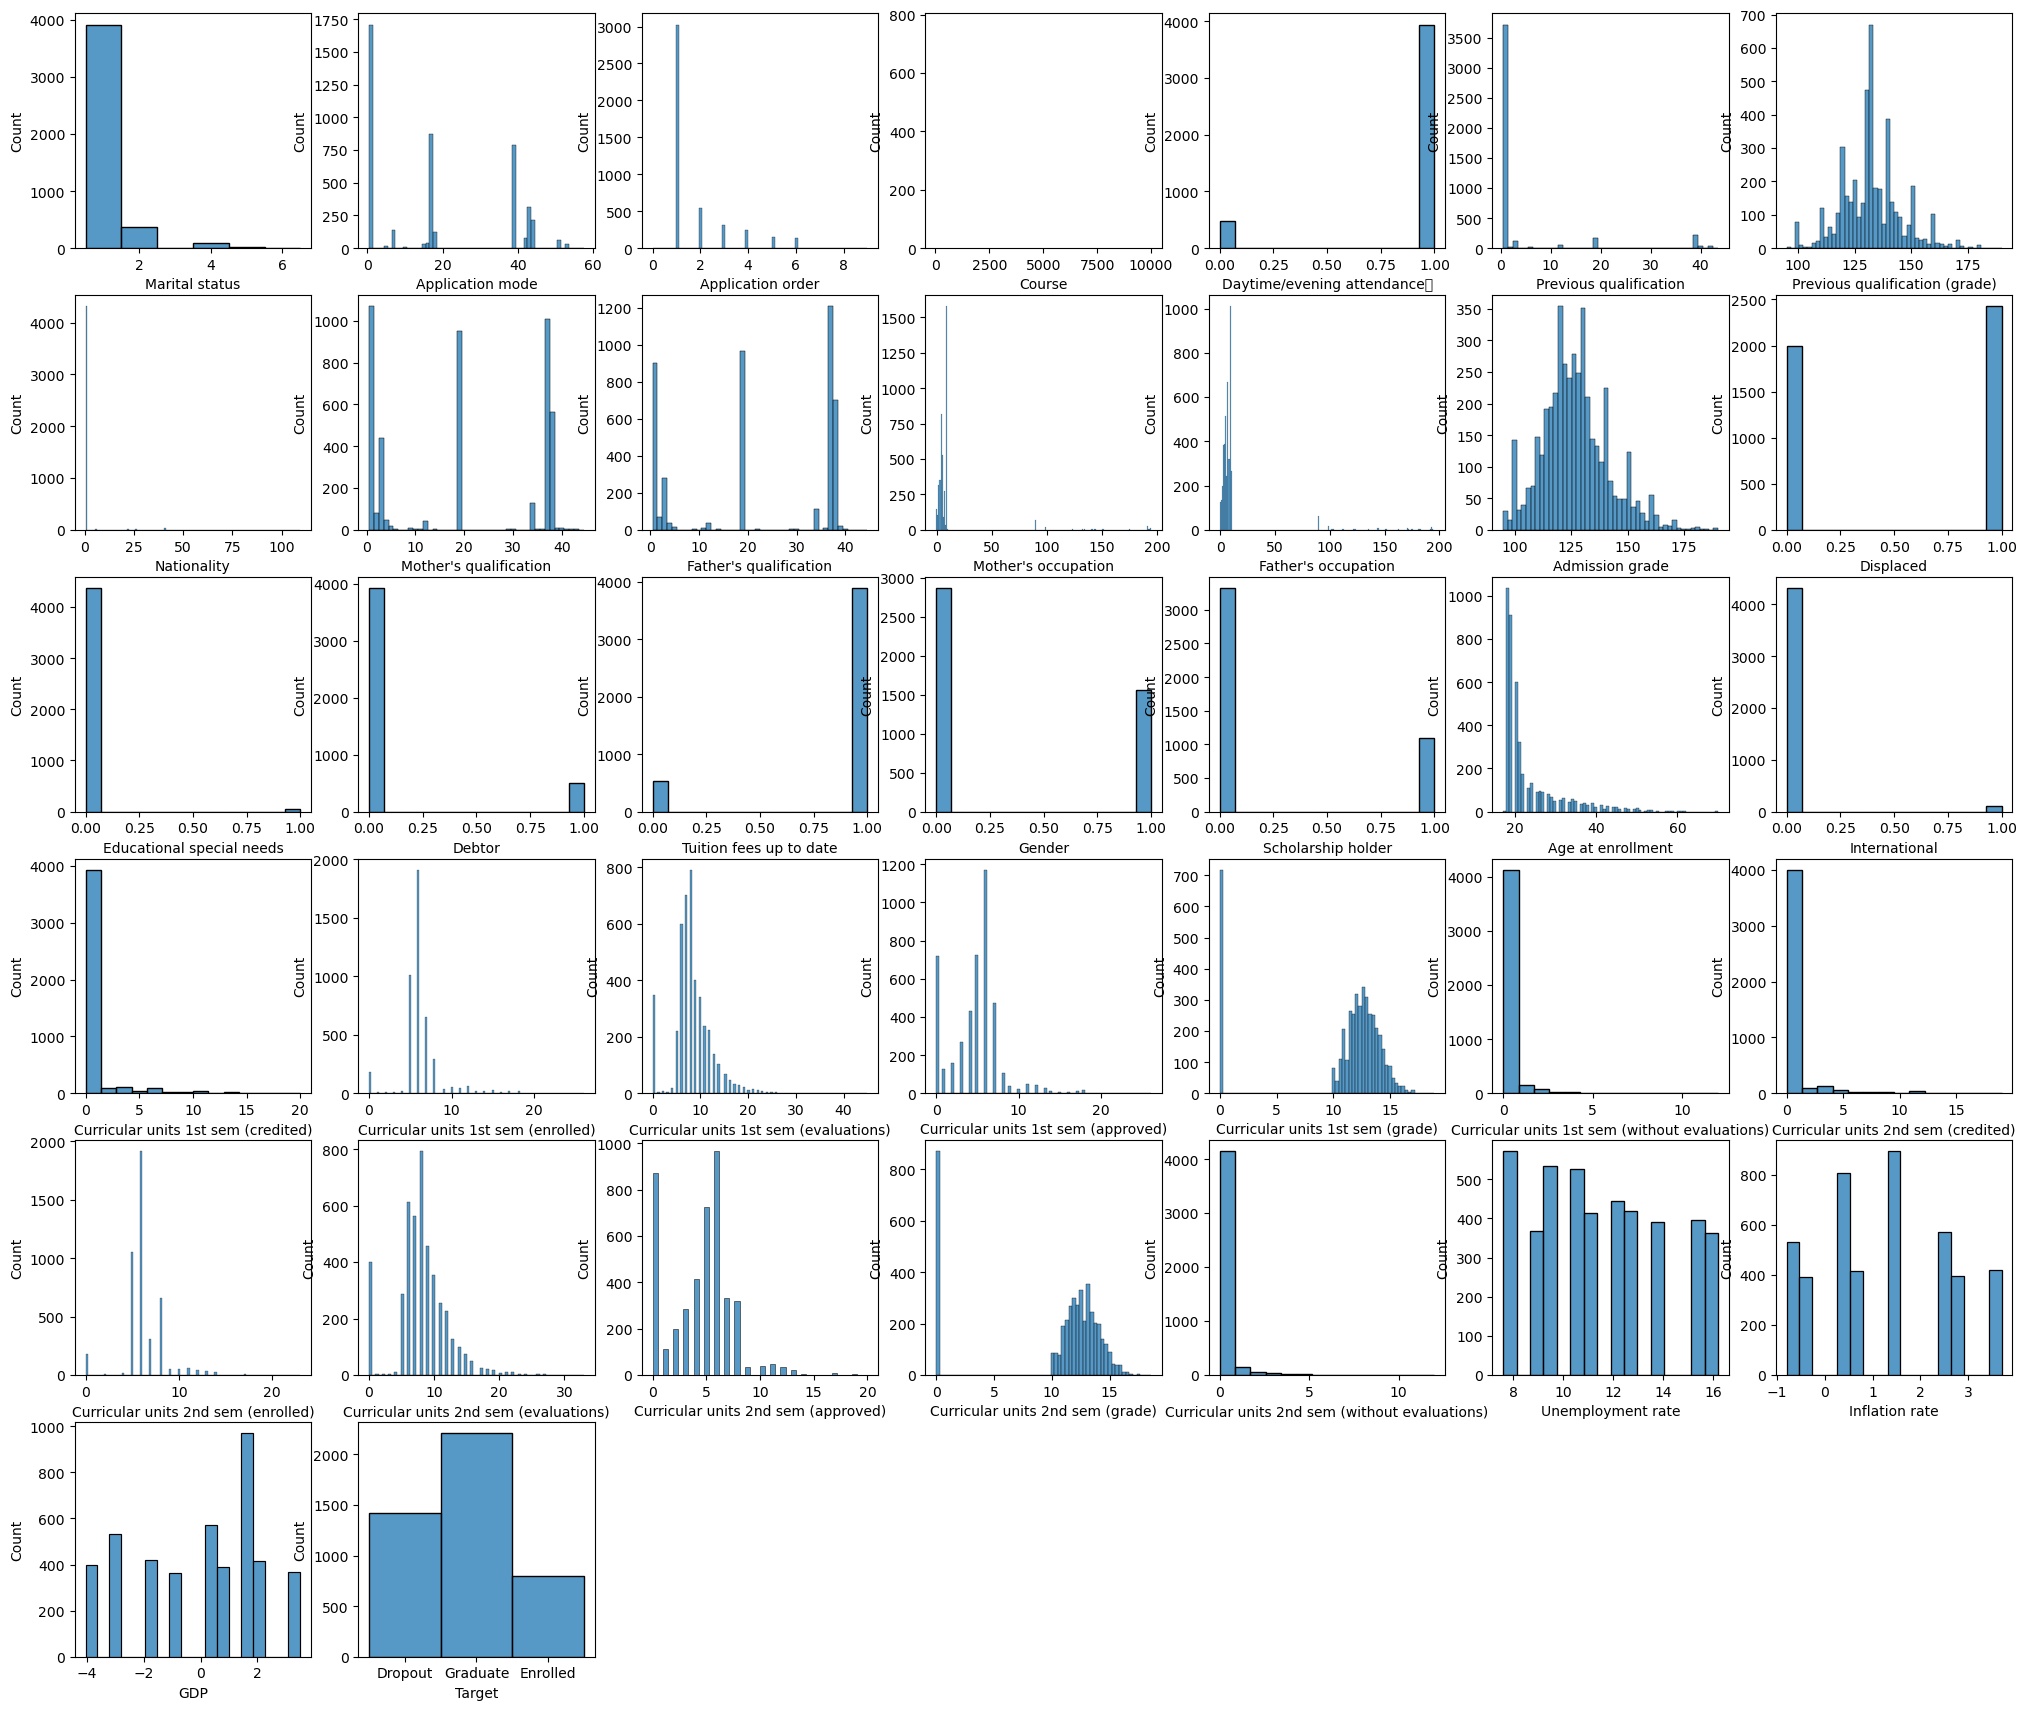

In [198]:
plt.figure(figsize=(25,25))
plt.tight_layout()
variables = list(df)
for i in range(len(variables)):
    plt.subplot(7,7,i+1)
    sns.histplot(data=df, x=variables[i]);

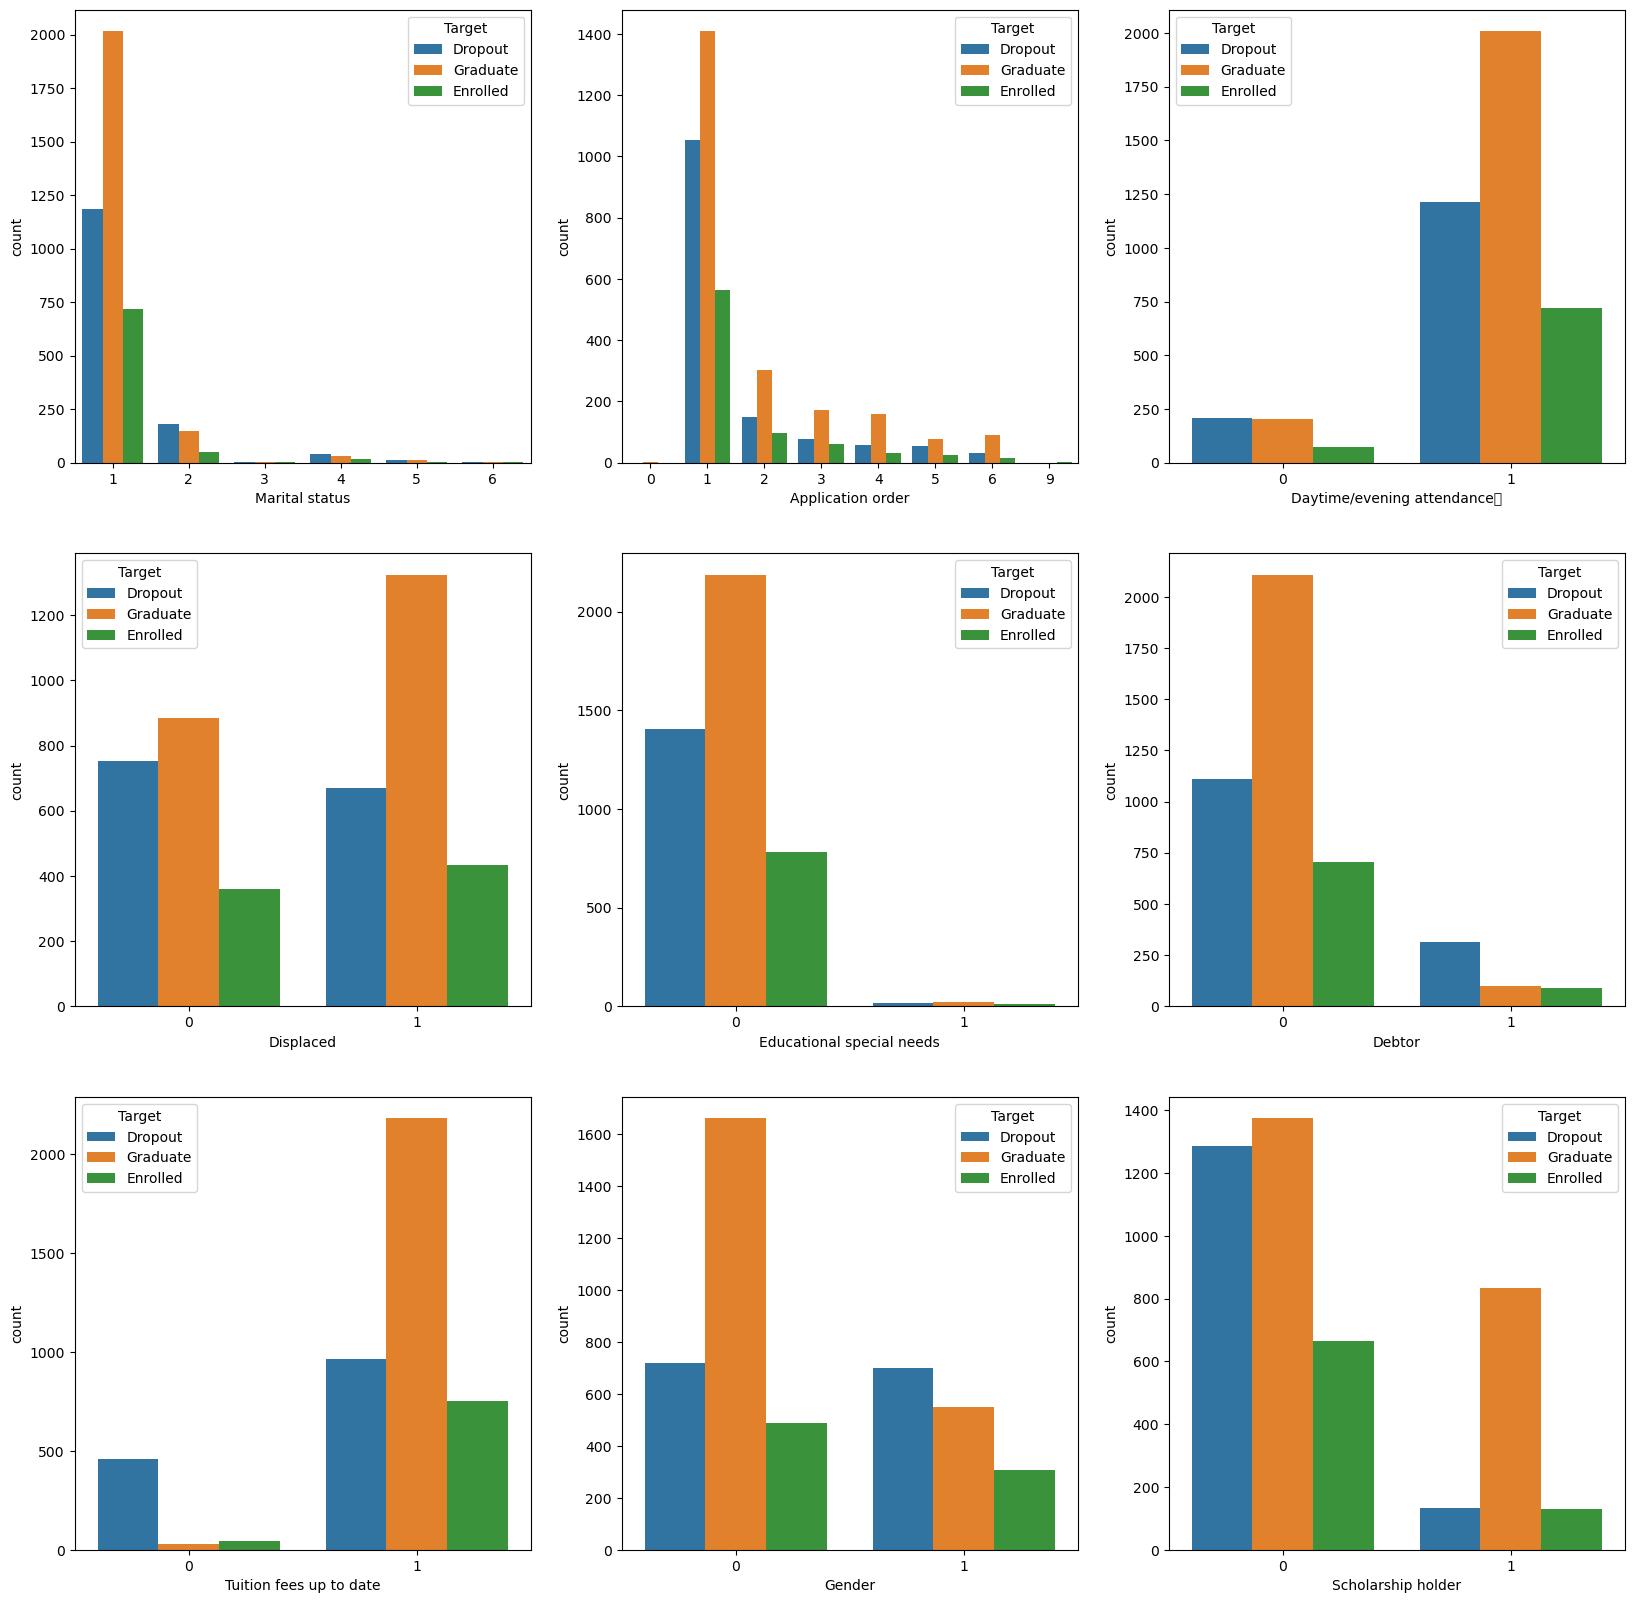

In [200]:
plt.figure(figsize=(20,20))
plt.tight_layout()
variables = ['Marital status', 'Application order', 'Daytime/evening attendance\t','Displaced', 
             'Educational special needs', 'Debtor','Tuition fees up to date', 'Gender', 'Scholarship holder']
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=variables[i], hue='Target');

# Prepare test and train data

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [208]:
le = LabelEncoder()

In [217]:
df['Marital status'] = le.fit_transform(df['Marital status'])
df['Application mode'] = le.fit_transform(df['Application mode'])
df['Course'] = le.fit_transform(df['Course'])
df['Previous qualification']= le.fit_transform(df['Previous qualification'])
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Mother\'s qualification'] = le.fit_transform(df['Mother\'s qualification'])
df['Father\'s qualification'] = le.fit_transform(df['Father\'s qualification'])
df['Mother\'s occupation'] = le.fit_transform(df['Mother\'s occupation'])
df['Father\'s occupation'] = le.fit_transform(df['Father\'s occupation'])
df['Target'] = le.fit_transform(df['Target'])

In [219]:
X = df.drop('Target', axis=1)
y = df.Target

In [221]:
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state = 12 ,test_size =0.2)

In [223]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Modeling

In [227]:
# choosing best estimators for Random Forest model: 
param_grid = {'max_depth': [2, 3, 4, 5, 6, 10, 100, 300], 'n_estimators':[100, 500, 1000]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid)
rf_model.fit(X_train, y_train)
print(f"Best estimators for Random Forest: {rf_model.best_estimator_}")

# choosing best estimators for AdaBoost model:
param_grid = {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.1, 0.2, 0.5, 0.7, 0.8, 1]}  
ada_model = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid)
ada_model.fit(X_train, y_train)
print(f"Best estimators for AdaBoost: {ada_model.best_estimator_}")

# choosing best estimators for svm model: 
param_grid = {'kernel': ['linear','poly','rbf'], 'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [1, 0.1]}  
svm_model = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid)
svm_model.fit(X_train_scaled, y_train)
print(f"Best estimators for SVM: {svm_model.best_estimator_}")

# choosing best estimators for KNN model:
param_grid = {'n_neighbors': list(range(3, 16, 2))}  
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_model.fit(X_train_scaled, y_train)
print(f"Best estimators for K-Nearest Neighbor: {knn_model.best_estimator_}")

# choosing best estimators for Gradient Boosting model:
param_grid = {'n_estimators': [10, 20, 50, 100, 300, 500], 'learning_rate': [0.1, 0.8, 1], 'max_depth' : [1, 2, 3, 5]}  
gb_model = GridSearchCV(XGBClassifier(random_state=42), param_grid)
gb_model.fit(X_train, y_train)
print(f"Best estimators for Gradient Boosting: {gb_model.best_estimator_}")

Best estimators for Random Forest: RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=42)
Best estimators for AdaBoost: AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)
Best estimators for SVM: SVC(C=10, class_weight='balanced', gamma=0.1, random_state=42)
Best estimators for K-Nearest Neighbor: KNeighborsClassifier(n_neighbors=9)
Best estimators for Gradient Boosting: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, 

In [229]:
rf = RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=42)
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)
svm = SVC(C=10, class_weight='balanced', gamma=1, random_state=42) 
knn = KNeighborsClassifier(n_neighbors=9)
gb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

## F-1 Score

In [231]:
def score(estimator, title, X, y, ylim=None, cv=None, scoring='f1_micro',n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_micro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    return test_scores_mean, test_scores_std


rf_mean, rf_std = score(rf,"Random Forest learning curves",X_train,y_train,cv=5)
ada_mean, ada_std = score(ada,"AdaBoost learning curves",X_train,y_train,cv=5)
svm_mean, svm_std = score(svm,"SVM learning curves",X_train_scaled,y_train,cv=5)
knn_mean, knn_std = score(knn,"K-Nearest Neighbor learning curves",X_train_scaled,y_train,cv=5)
gb_mean, gb_std = score(gb,"Gradient Boosting learning curves",X_train,y_train,cv=5)

In [233]:
# printing accuracy and std of validation for each model
print(f"\nRandom Forest score: {rf_mean.mean():.2f} ({rf_std.mean():.2f})\n")
print(f"\nAdaBoost score: {ada_mean.mean():.2f} ({ada_std.mean():.2f})\n")
print(f"\nSVM score: {svm_mean.mean():.2f} ({svm_std.mean():.2f})\n")
print(f"\nK-Nearest Neighbor score: {knn_mean.mean():.2f} ({knn_std.mean():.2f})\n")
print(f"\nGradient Boosting score: {gb_mean.mean():.2f} ({gb_std.mean():.2f})\n")


Random Forest score: 0.76 (0.01)


AdaBoost score: 0.74 (0.01)


SVM score: 0.69 (0.01)


K-Nearest Neighbor score: 0.67 (0.02)


Gradient Boosting score: 0.75 (0.01)

